## SECTION: Math prerequisites
### LECTURE: Softmax

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[14 13 14  6 -5 -4 -3 -2  8  6  8 -3  8  1  8 -4  1 -3  4 -4 11 13 -3  5
 10]


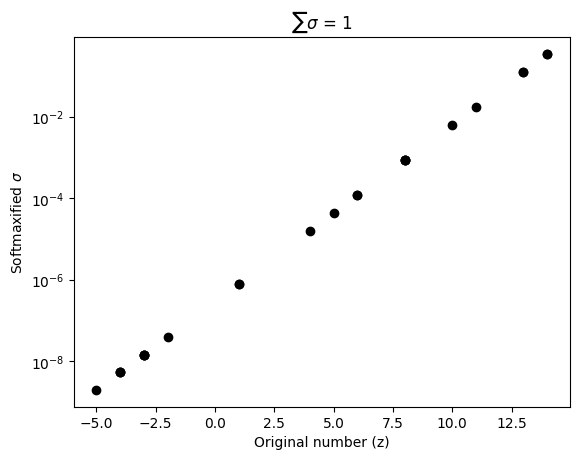

In [3]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

# Using pytorch

In [4]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([3.5529e-01, 1.3070e-01, 3.5529e-01, 1.1919e-04, 1.9906e-09, 5.4110e-09,
        1.4709e-08, 3.9982e-08, 8.8067e-04, 1.1919e-04, 8.8067e-04, 1.4709e-08,
        8.8067e-04, 8.0307e-07, 8.8067e-04, 5.4110e-09, 8.0307e-07, 1.4709e-08,
        1.6130e-05, 5.4110e-09, 1.7689e-02, 1.3070e-01, 1.4709e-08, 4.3846e-05,
        6.5073e-03])


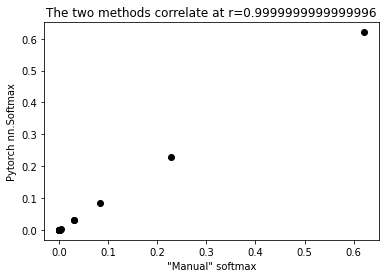

In [5]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()